# Visualization

Junet has sophisticated plotting capabilities, which are overviewed in this file.

In [1]:
using Junet

In [2]:
g1 = graph_random(100, .05)

100-node 476-edge directed multigraph

In [3]:
?graph_random

search: graph_random



```
graph_random(n::Integer, m::Integer)
graph_random(n::Integer, p::AbstractFloat)
```

A shorthand for creating random networks. There are two similar but distinct models:

  * `(n, m)` model, also known as Erdős–Rényi model. It randomly selects a  graph from a set of all possible graphs which have `n` nodes and `m` edges.
  * `(n, p)` model, introduced by Gilbert. For a graph on `n` nodes, it includes each edge with probability `p` independently of the others. This gives a graph with mathematical expectation of density equal to `p`.

This method is just a shorthand for [`graph_erdos_renyi`](@ref) and  [`graph_gilbert`](@ref), which implement these models and are chosen automatically based on the argument types.

If you need a graph of high density, use `(n, p)` model as it is much faster. If you want an exact number of edges with lower density, use `(n, m)` model.

# Examples

```julia-repl
julia> g = graph_random(4, 1.)
4-node 12-edge directed multigraph

julia> g = graph_random(4, 1)
4-node 1-edge directed multigraph
```

# References

[Wikipedia](https://en.wikipedia.org/wiki/Erdős–Rényi_model)


In [4]:
g2 = graph_small_world(100, 6, .1)

100-node 300-edge directed graph

In [5]:
?graph_small_world

search: graph_small_world



```
graph_small_world(n::Integer, m::Integer, p::Real, multiple=false; params...)
```

Small-world network model of Watts and Strogatz (1998).

# Arguments

  * `n` — number of nodes,
  * `k` — number of neighbors for each node, should be even,
  * `p` — probability of random rewiring of an edge,
  * `simple=true` — whether or not to create a simple graph  (multiple edges and self-loops are disallowed).

# References

Watts, D. J., & Strogatz, S. H. (1998). Collective dynamics of “small-world” networks. Nature, 393(6684), 440–442.


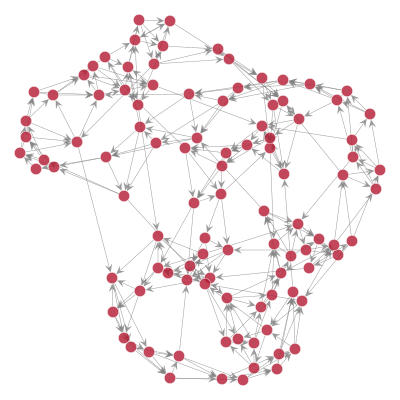

In [6]:
plot(g2)

## Layouts

Now, let us customize this image.

The most fundamental part of network visualization is the layout. There is a choice of different methods for that in Junet.

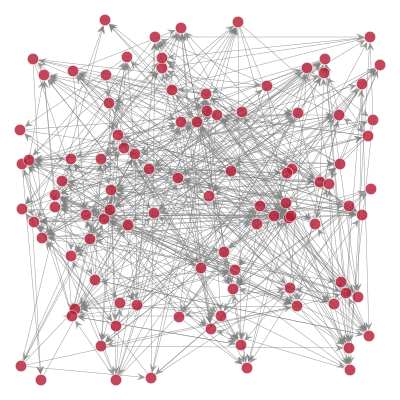

In [7]:
plot(g1, layout=layout_random(g1))

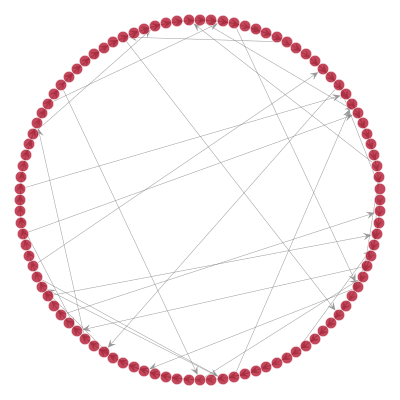

In [8]:
plot(g2, layout=layout_circle(g2))

## Sizes and formats

Junet is built on Cairo, and currently supports the PNG, SVG, PDF, and EPS output.
To control the size and the aspect ratio of the image, use `size` and `zoom` keyword arguments.

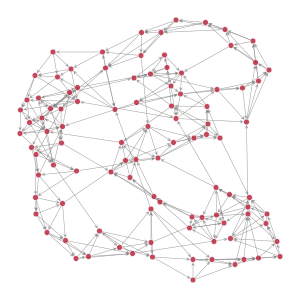

In [9]:
plot(g2, size=(300, 300), zoom=.5, format=:png)

In [11]:
plot(g2, size=(300, 300), format=:pdf, file="plot.pdf")

## Colors, sizes and shapes

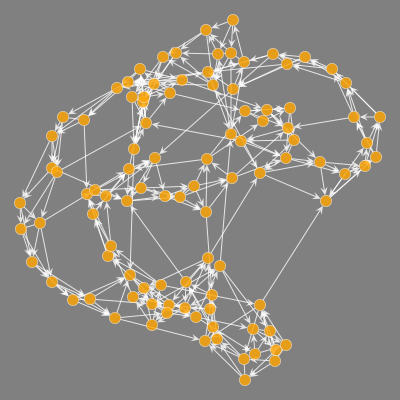

In [12]:
plot(g2, bg_color="grey", node_color="orange", 
     edge_color="white", edge_width=1)

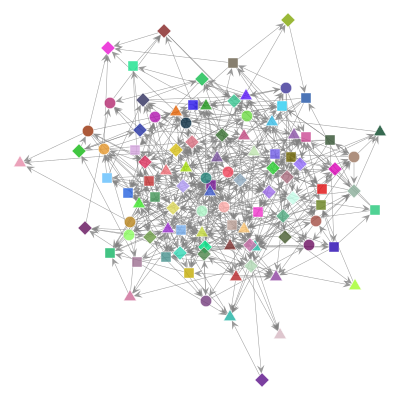

In [13]:
plot(g1, node_color=[(rand(), rand(), rand()) for _ = nodes(g1)],
    node_shape=[(:circle, :square, :triangle, :diamond)[rand(1:end)] for _ = nodes(g1)])

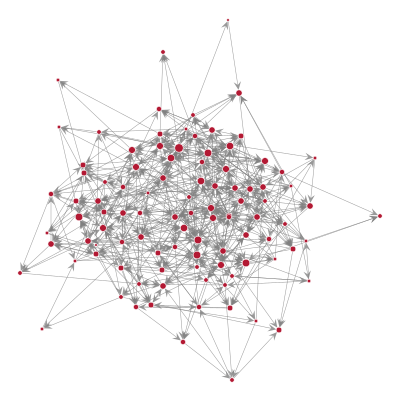

In [14]:
plot(g1, node_size=5indegree(g1), node_opacity=rand(nodecount(g1)),
    node_opacity=kcores(g1))

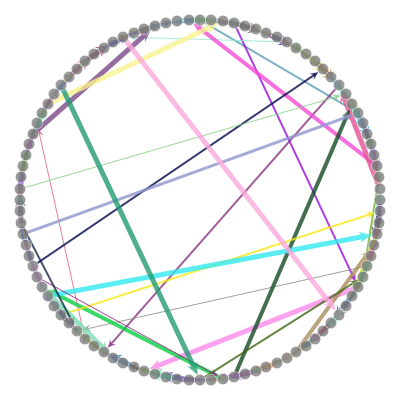

In [16]:
plot(g2, layout=layout_circle(g2), node_color="grey",
    edge_color=[(rand(), rand(), rand()) for _ = 1:edgecount(g2)],
    edge_width=rand(1:5, edgecount(g2)))

## Additional features

Some advanced features are being currently added to Junet, such as support for curved edges and/or tapered edges.

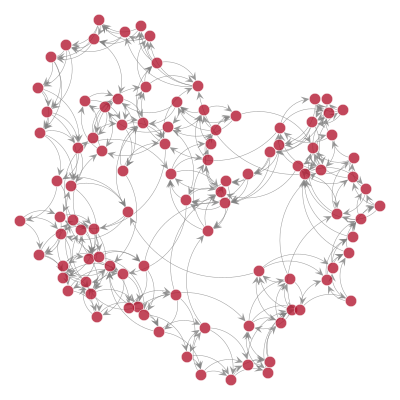

In [17]:
plot(g2, edge_curve=.5)

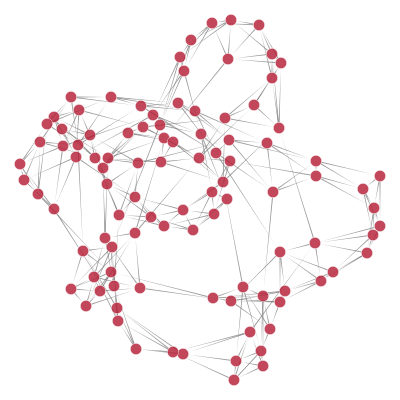

In [18]:
plot(g2, edge_shape=:tapered)

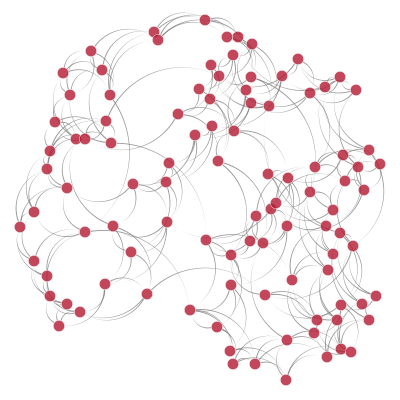

In [19]:
plot(g2, edge_shape=:tapered, edge_curve=.5)